In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/angkasatech/ds/37146328bc5814f4e7a0adb739e6574def32b6dc/banking_train.csv', delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#the dataframe has 45211 entries and 17 columns
#there are 17 columns with 7 int64 dtype and 10 object dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#Data Cleansing

## Handle Missing Values

In [5]:
#check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Seperti yang ditampilkan di atas, tidak terdapat missing values pada setiap kolomnya.

## Handle Duplicate Data

In [6]:
df.duplicated().sum()

0

berdasarkan semua kolom, tidak terdapat kolom yang duplikat. Hal ini dikarenakan dia menghitung nilai duplicated berdasarkan semua kolom

Kita harus menggunakan kolom yang memiliki hubungan dengan bank client, yang bisa digunakan sebagai identifier tiap customernya, dalam dataframe ini, kita bisa menggunakan kolom:
- age : Umur Customer
- job : Jenis pekerjaan customer(categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
- marital : Status pernikahan Customer(categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- education : Tingkat pendidikan customer (categorical: "unknown","secondary","primary","tertiary")
- default: kepemilikan customer terhadap credit default? (binary: "yes","no")
- balance: rata-rata pendapatan customer per tahun, in euros (numeric)
- housing: kepemilikan customer terhadap pinjaman rumah? (binary: "yes","no")
- loan: kepemilikan customer terhadap pinjaman pribadi? (binary: "yes","no")

In [7]:
df.duplicated(subset='age balance job marital education default housing loan'.split()).sum()

4163

In [8]:
#show the duplicate column
df[df.duplicated(subset='age balance job marital education default housing loan'.split())]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
492,36,blue-collar,married,secondary,no,0,yes,no,unknown,6,may,337,1,-1,0,unknown,no
523,29,management,single,tertiary,no,0,yes,no,unknown,6,may,211,1,-1,0,unknown,no
644,43,unemployed,married,secondary,no,0,yes,no,unknown,6,may,37,2,-1,0,unknown,no
772,42,technician,single,secondary,no,0,yes,no,unknown,7,may,275,4,-1,0,unknown,no
779,42,admin.,married,secondary,no,445,yes,no,unknown,7,may,202,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45193,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes


Terdapat 4163 baris yang memiliki nilai duplikat berdasarkan kolom age, balance, job, marital, education, default, housing, dan loan

drop the duplicate column

In [9]:
df.drop_duplicates(subset='age balance job marital education default housing loan'.split(), inplace=True)

In [10]:
df.duplicated(subset='age balance job marital education default housing loan'.split()).sum()

0

the duplicate values have been dropped succesfully

## Handling Data Bermasalah Lainnnya

In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Walaupun tidak terdapat missing value pada setiap kolom, tetapi kita tetap perlu melihat nilai dari setiap masing-masing kolom. Apakah terdapat nilai-nilai yang unik, aneh, ataupun yang bermasalah yang kita perlua lakukan treatment?

### For categorical datatype

In [12]:
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,41048,41048,41048,41048,41048,41048,41048,41048,41048,41048
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9068,24571,21188,40251,23097,34172,25620,13022,35636,36707


Jika kita lihat dari nilai statistik deskriptif untuk kolom kategorikal, seperti tidak terlihat ada data-data yang bermasalah. Kita perlu mencoba untuk menghitung nilai yang muncul pada setiap kolom kategorikal

In [13]:
#value_counts untuk kolom job
df.job.value_counts()

blue-collar      9068
management       8301
technician       6817
admin.           4711
services         3863
retired          1997
self-employed    1455
entrepreneur     1388
unemployed       1210
housemaid        1148
student           818
unknown           272
Name: job, dtype: int64

In [14]:
#value_counts untuk kolom marital
df.marital.value_counts()

married     24571
single      11630
divorced     4847
Name: marital, dtype: int64

In [15]:
#value_counts untuk kolom education
df.education.value_counts()

secondary    21188
tertiary     11710
primary       6408
unknown       1742
Name: education, dtype: int64

In [16]:
#value_counts untuk kolom default
df.default.value_counts()

no     40251
yes      797
Name: default, dtype: int64

In [17]:
#value_counts untuk kolom housing
df.housing.value_counts()

yes    23097
no     17951
Name: housing, dtype: int64

In [18]:
#value_counts untuk kolom loan
df.loan.value_counts()

no     34172
yes     6876
Name: loan, dtype: int64

In [19]:
#value_counts untuk kolom contact
df.contact.value_counts()

cellular     25620
unknown      12823
telephone     2605
Name: contact, dtype: int64

In [20]:
#value_counts untuk kolom month
df.month.value_counts()

may    13022
jul     6533
aug     5560
jun     5081
nov     3266
apr     2540
feb     2278
jan     1211
oct      560
sep      439
mar      391
dec      167
Name: month, dtype: int64

In [21]:
#value_counts untuk kolom poutcome
df.poutcome.value_counts()

unknown    35636
failure     3052
other       1722
success      638
Name: poutcome, dtype: int64

In [22]:
#value_counts untuk kolom y
df.y.value_counts()

no     36707
yes     4341
Name: y, dtype: int64

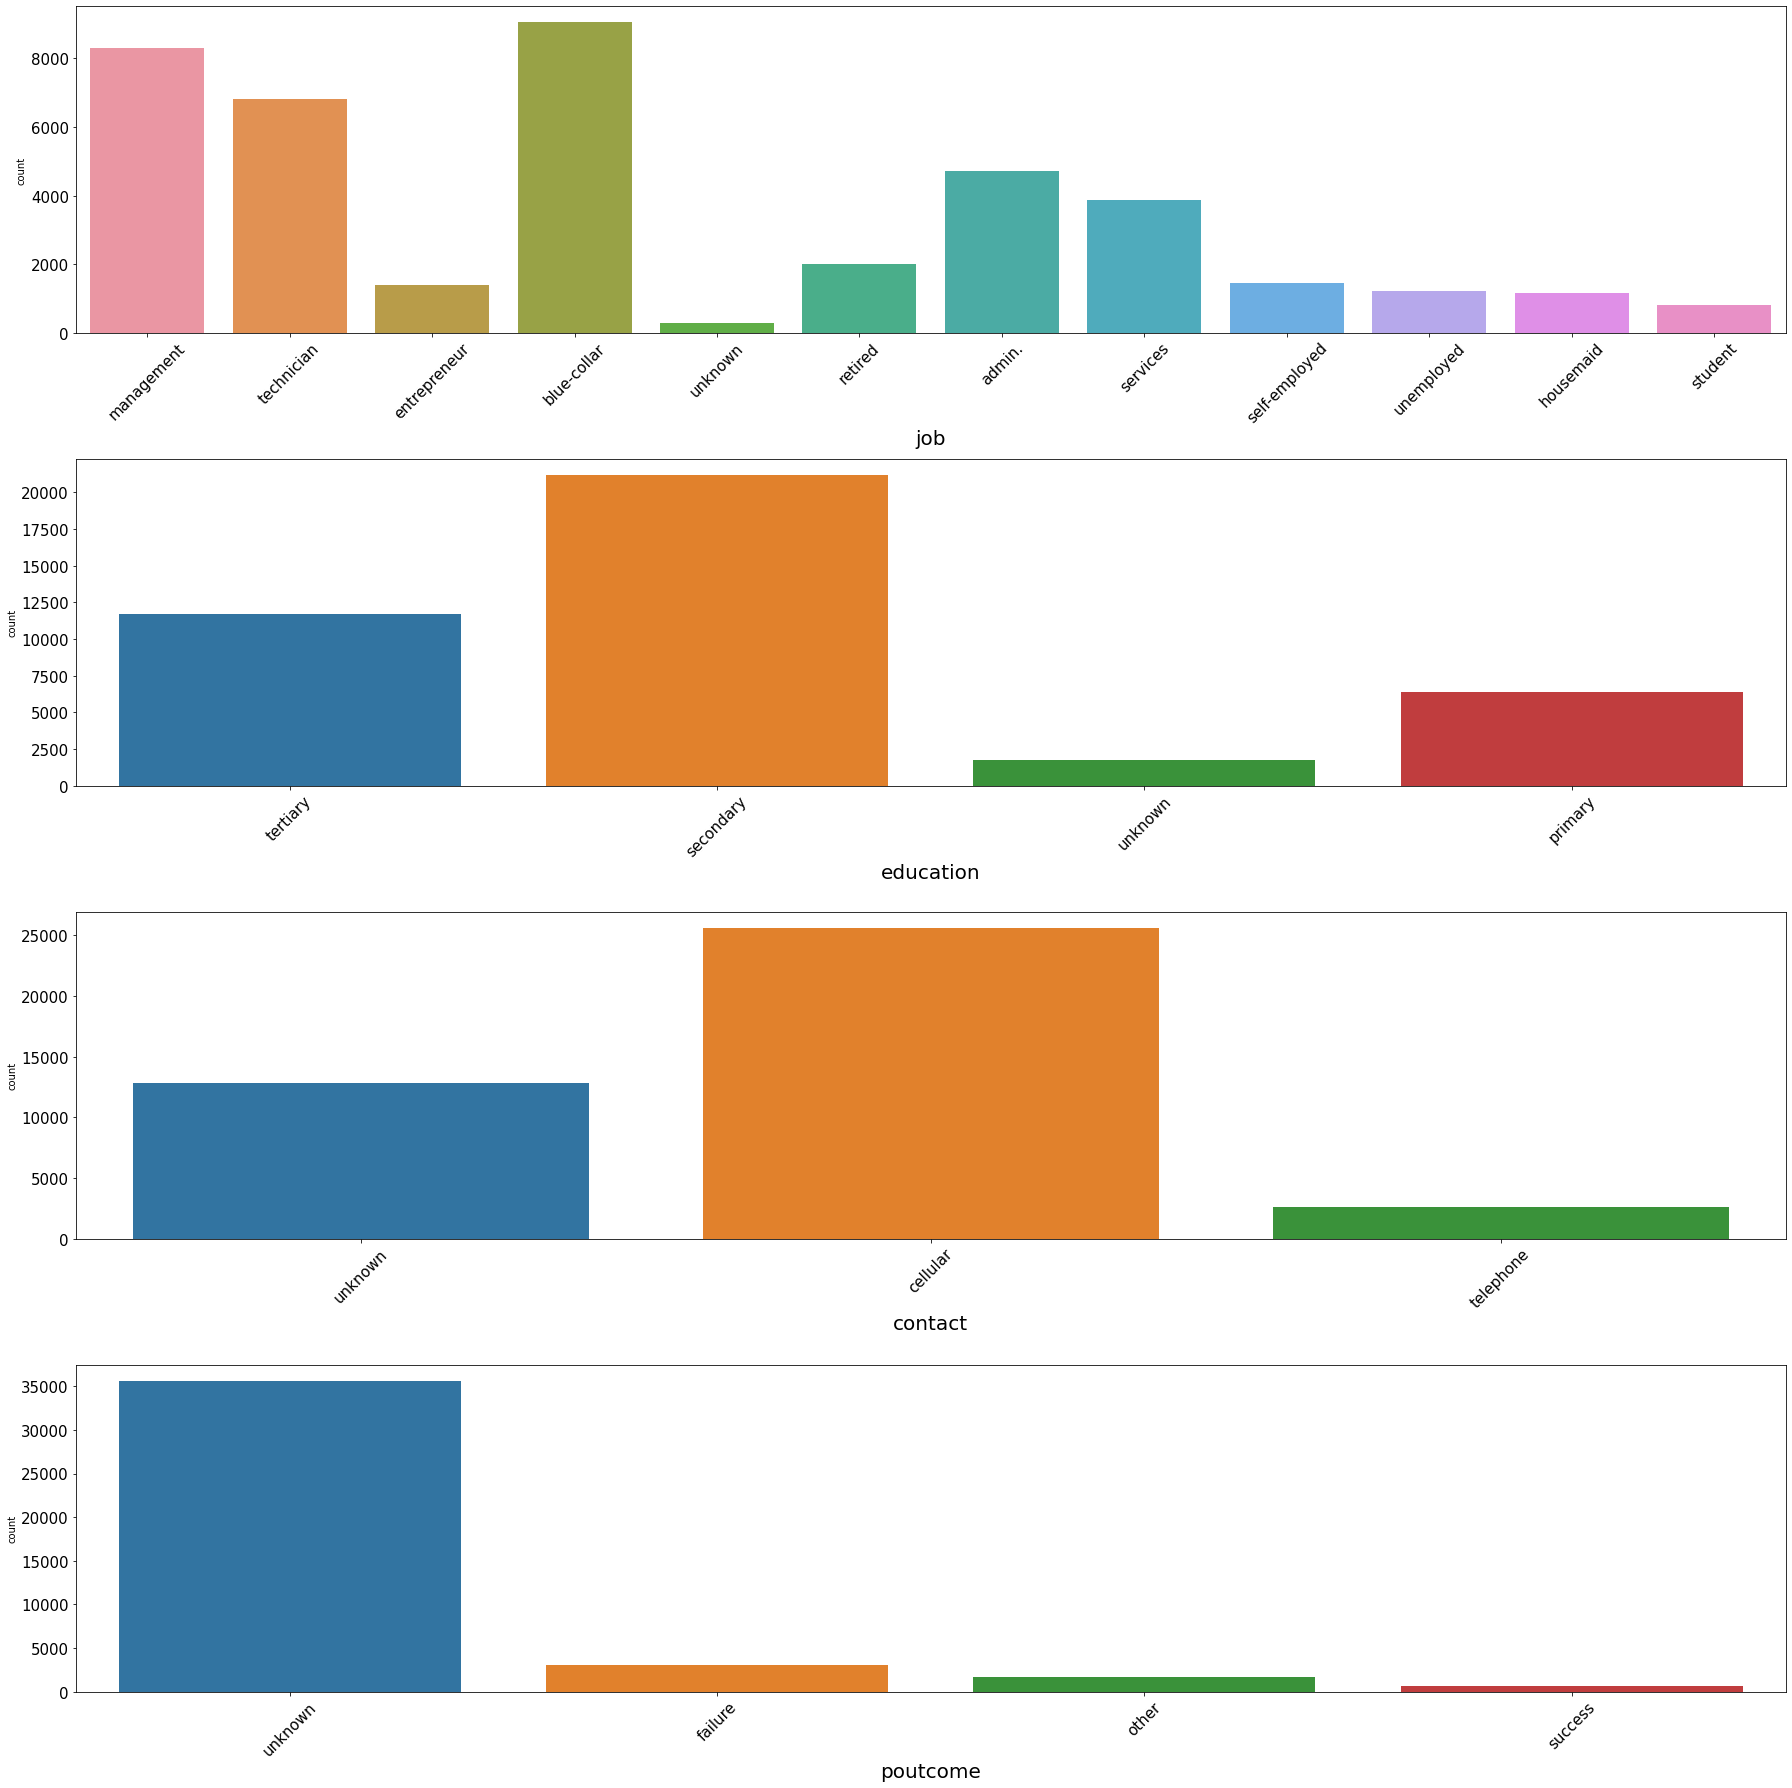

In [23]:
cat='job education contact poutcome'.split()
plt.figure(figsize=(25,30))
for i in range(0, len(cat)):
    plt.subplot(5,1,i+1)
    sns.countplot(x=df[cat[i]])
    plt.xticks(rotation=45)
    plt.xlabel(cat[i],fontsize=20)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
    plt.tight_layout()

Setelah kita hitung nilai pada setiap kolom kategorikalnya ternyata ditemukan beberapa hal, yaitu:
- terdapat 272 nilai 'unknown' pada kolom job
- terdapat 1742 nilai 'unknown' pada kolom education
- terdapat 12823 nilai 'unknown' pada kolom contact
- terdapat 35636 nilai 'unknown' pada kolom poutcome

*Mereplace nilai 'unknown' pada kolom job, education, dan contact dengan nilai modus dari masing-masing kolom tersebut*

In [24]:
#lakukan imputasi/replace nilai modus pada kolom job, education, dan contact yang memiliki nilai 'unknown'
col='job education contact'.split()
#replace kolom job
for i in col:
  df[i]=df[i].replace(['unknown'],df[i].mode()[0])

*Untuk kolom poutcome, nilai 'unknown' dibiarkan saja karena nantinya kolom poutcome akan didrop karena dinilai memiliki potensi redundant dengan kolom pdays*

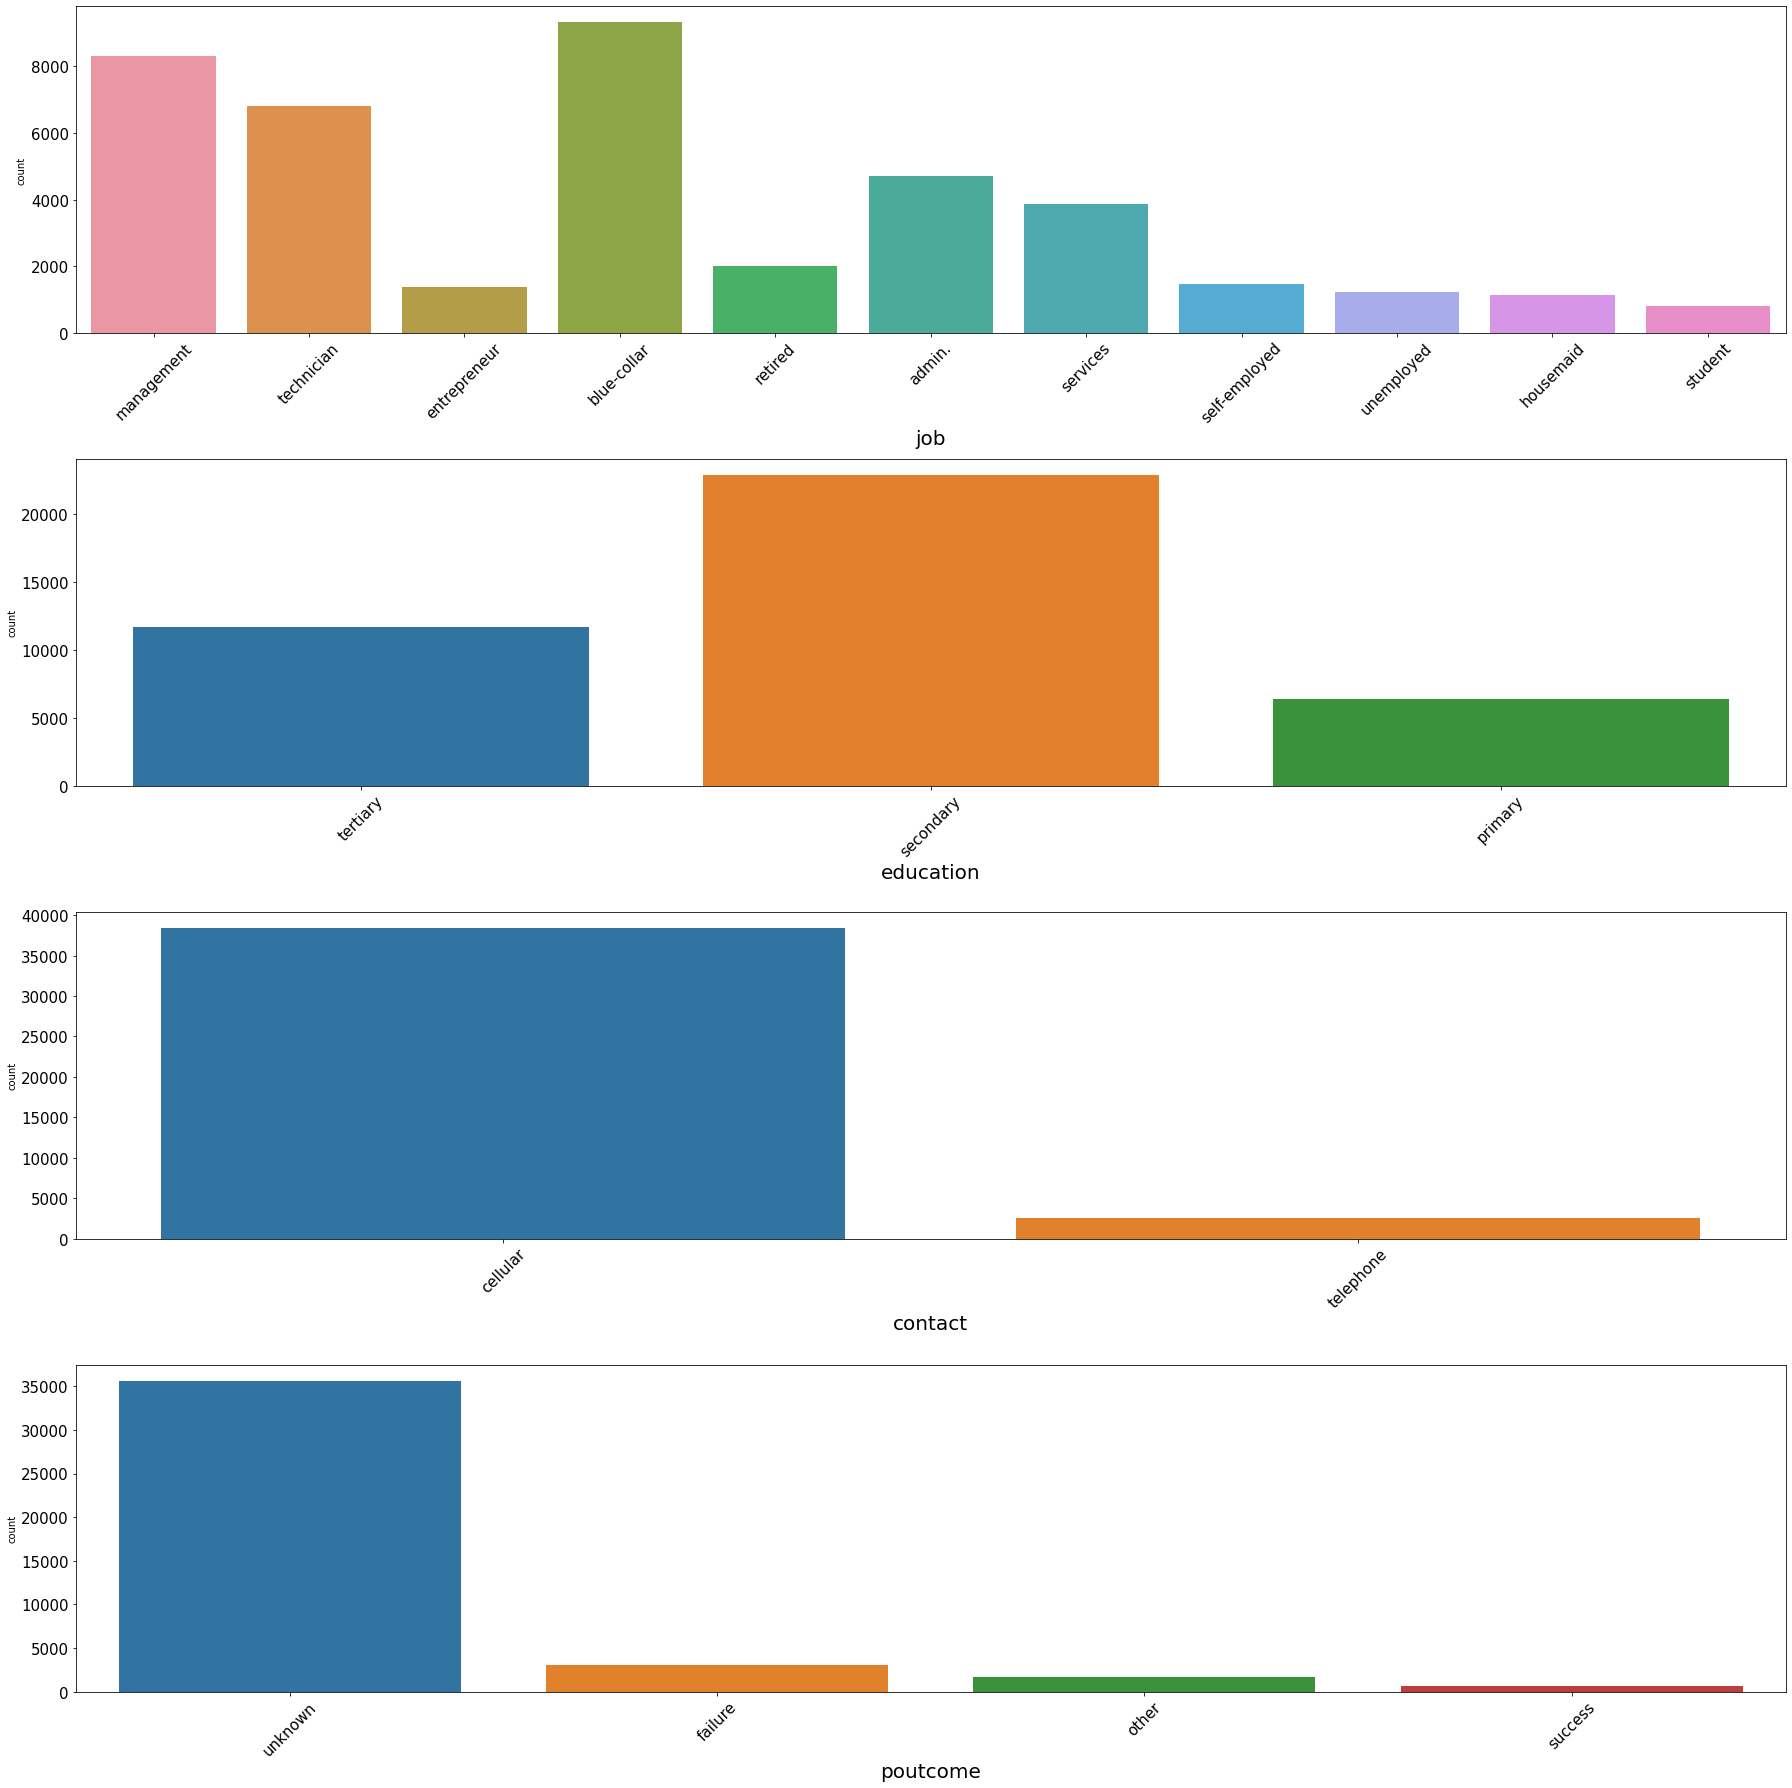

In [25]:
plt.figure(figsize=(25,30))
for i in range(0, len(cat)):
    plt.subplot(5,1,i+1)
    sns.countplot(x=df[cat[i]])
    plt.xticks(rotation=45)
    plt.xlabel(cat[i],fontsize=20)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
    plt.tight_layout()

### For numerical datatype

In [26]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,41048.000000,41048.000000,41048.000000,41048.000000,41048.000000,41048.000000,41048.000000
mean,40.920483,1375.931129,15.819017,258.792365,2.801525,33.526189,0.425526
std,10.540510,3055.188601,8.309649,259.885728,3.144602,97.857183,2.189537
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,91.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,469.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1449.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Jika kita lihat dari nilai statistik deskriptif untuk kolom numerical, terdapat beberapa kolom yang memiliki nilai yang perlu perhatian:
- kolom balance yang memiliki nilai minimum bernilai negatif,
- kolom pdays yang memiliki nilai -1 ini memiliki arti bahwa customer tidak ditelpon dari campaign sebelumnya.

**Mereplace nilai minus pada kolom balance dengan nilai 0**

In [27]:
import warnings
warnings.filterwarnings('ignore')

df['balance'][df['balance']<0]=0

Untuk kolom pdays tidak dilakukan treatment terhadap nilai anehnya, karena **nantinya kolom pdays ini akan didrop karena memiliki potensi redundant dengan kolom poutcome**

## Handle outliers

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,unknown,no


In [29]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,41048.000000,41048.000000,41048.000000,41048.000000,41048.000000,41048.000000,41048.000000
mean,40.920483,1404.503191,15.819017,258.792365,2.801525,33.526189,0.425526
std,10.540510,3038.626528,8.309649,259.885728,3.144602,97.857183,2.189537
min,18.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,91.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,469.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1449.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [30]:
# Mengecek Data kosong
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41048 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41048 non-null  int64 
 1   job        41048 non-null  object
 2   marital    41048 non-null  object
 3   education  41048 non-null  object
 4   default    41048 non-null  object
 5   balance    41048 non-null  int64 
 6   housing    41048 non-null  object
 7   loan       41048 non-null  object
 8   contact    41048 non-null  object
 9   day        41048 non-null  int64 
 10  month      41048 non-null  object
 11  duration   41048 non-null  int64 
 12  campaign   41048 non-null  int64 
 13  pdays      41048 non-null  int64 
 14  previous   41048 non-null  int64 
 15  poutcome   41048 non-null  object
 16  y          41048 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.6+ MB


Tidak ada data yang kosong

In [32]:
#df.duplicated(subset=['age','job','marital','education','default','balance','housing','loan','y']).sum()
df.duplicated().sum()

0

Tidak ada data duplikat

In [33]:
cats = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
nums = ['age','balance','day','duration','campaign','pdays','previous']

Dari tampilan boxplot, terlihat bahwa terdapat **outlier** pada kolom : **Age, Balance, Duration, Campaign, Pdays, dan Previous**

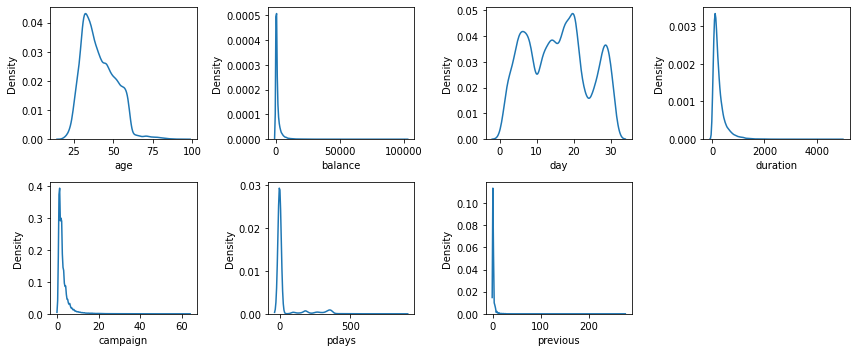

In [34]:
# kolom numerical dengan distplot
features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

Dari data numerik, yang **skewed positive** adalah **Age, Balance, Duration, Campaign, Pdays, dan Previous**. Maka data tersebut dapat ditransformasi menggunakan log transformation

In [35]:
df[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,41048.000000,41048.000000,41048.000000,41048.000000,41048.000000,41048.000000,41048.000000
mean,40.920483,1404.503191,15.819017,258.792365,2.801525,33.526189,0.425526
std,10.540510,3038.626528,8.309649,259.885728,3.144602,97.857183,2.189537
min,18.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,91.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,469.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1449.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [36]:
for col in cats:
    print(f'''{col}:''')
    print(df[col].value_counts())
    print()

job:
blue-collar      9340
management       8301
technician       6817
admin.           4711
services         3863
retired          1997
self-employed    1455
entrepreneur     1388
unemployed       1210
housemaid        1148
student           818
Name: job, dtype: int64

marital:
married     24571
single      11630
divorced     4847
Name: marital, dtype: int64

education:
secondary    22930
tertiary     11710
primary       6408
Name: education, dtype: int64

default:
no     40251
yes      797
Name: default, dtype: int64

housing:
yes    23097
no     17951
Name: housing, dtype: int64

loan:
no     34172
yes     6876
Name: loan, dtype: int64

contact:
cellular     38443
telephone     2605
Name: contact, dtype: int64

month:
may    13022
jul     6533
aug     5560
jun     5081
nov     3266
apr     2540
feb     2278
jan     1211
oct      560
sep      439
mar      391
dec      167
Name: month, dtype: int64

poutcome:
unknown    35636
failure     3052
other       1722
success      638
Name: p

Data numerical:
1. age	    : Normalisasi 
2. balance  : Log transformasi -> normalisasi -> z-score
3. day	    :  Masih bingung fungsinya utk apa,too many unique value (**drop?**)
>Ide : Bisa dibuat perminggu (1-4), tapi soal tgl 25 gmn tuh orang2 ada yg gajian awal bulan, ada yg akhir bulan(?)
4. duration	: Log transformasi -> Normalisasi -> z-score
5. campaign	: (Drop) terlalu banyak (Q3) yang nilainya <=3 pdhl (max=63) 
6. pdays	  : (Drop) terlalu banyak (Q3) yang nilai -1 (max=871)
7. previous : (Drop soalnya sampe Q3 masih  0 ->max=275) Log tranformasi

Data kategorikal:
1. job : Label encoding -> **Drop values unknown 288** -setau saya kalo job bisa diisi dengan modus-
2. marital : One hot encoding (**class imbalance atau no??**)
3. education : Label encoding -> **Drop baris value unknown karena cuma 1857**{tapi bingung krn ada 1000++} -mungkin penerapannya bisa sama dengan job diisi dengan modus?-
4. default (bin) : Label encoding (Class imbalance)-> **Oversampling**/drop
5. housing (bin) : Label encoding 
6. loan (bin): Label encoding (Class imbalance) -> **Oversampling**/drop
7. contact : Value 'unknown' terlalu banyak ~1/3 data -> **Drop**/oversampling
8. month : One Hot encoding/**Drop** -> Too many unique values
9. poutcome : **Drop**(/oversampling) Terlalu banyak kategori 'Unknown'

**Ada berapa jumlah baris dengan nominal 'balance' negative**

In [37]:
df[df['balance']<0].shape[0]

0

### Handling Outlier dengan Z-Score ##

In [38]:
from scipy import stats
import numpy as np

In [39]:
nums_skew = ['age','balance','duration','campaign','pdays','previous']

In [40]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 41048
Jumlah baris setelah memfilter outlier: 36206


###Visualisasi Data Setelah Penghapusan Outlier###

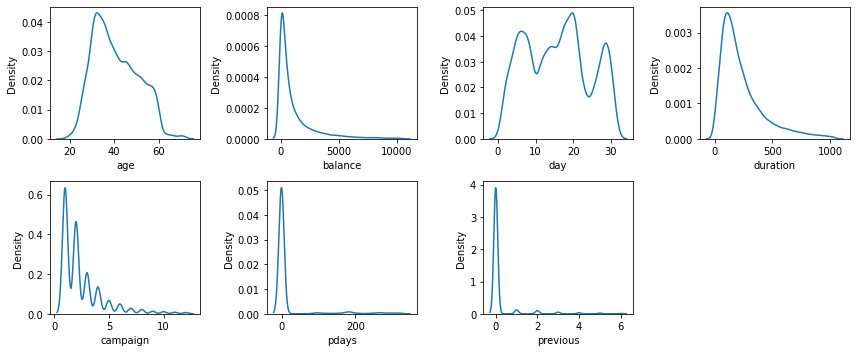

In [41]:
# kolom numerical dengan distplot
features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

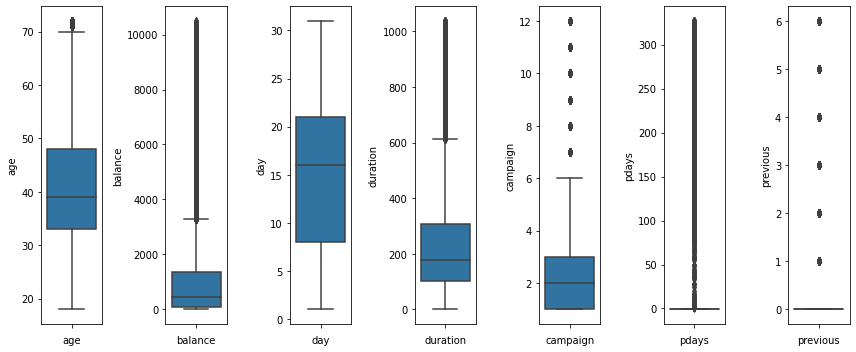

In [42]:
# kolom numerical dengan boxplot
features = nums
plt.figure(figsize=(12,5))

for i in range(0, len(nums)):
    plt.subplot(1,len(features) , i+1)
    sns.boxplot(y=df[features[i]], orient='v')
    plt.xlabel(features[i])
    plt.tight_layout()

In [43]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,36206.000000,36206.000000,36206.000000,36206.000000,36206.000000,36206.000000,36206.000000
mean,40.698752,1124.963597,15.845385,236.377203,2.495553,14.971193,0.189554
std,10.076242,1699.870716,8.368657,192.631082,1.973312,58.446110,0.757453
min,18.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,84.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1364.000000,21.000000,307.000000,3.000000,-1.000000,0.000000
max,72.000000,10500.000000,31.000000,1038.000000,12.000000,327.000000,6.000000


**Setelah menghapus outlier, data menjadi seperti di atas**

# Data Transformation

**Distribusi age, balance,duration, campaign, pdays, previous (setelah log transformation)**

Data numerical:
1. age	    : Norm
2. balance  : STD aja deh
3. day	    : Norm
4. duration	: Log
5. campaign	: STD
6. pdays	  : Clipping (kl gk std)
7. previous : Clipping (kl gk std)

Income jangan make norm, karena penghasilan bisa ngjomplang orang satu dengan lainnya

Klo norm itu usahakan yang gk banyak outlier, dan lebih ke normal


### Hasil Visualiasi jika transform menggunakan Log-Transformation ###

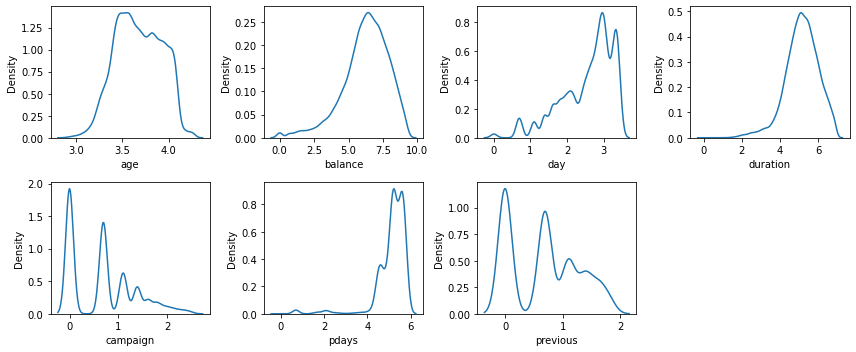

In [44]:
# distribusi age, balance,duration, campaign, pdays, previous (setelah log transformation)

#sns.kdeplot(np.log(df[nums_skew]))

features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=np.log(df[features[i]]))
    plt.xlabel(features[i])
    plt.tight_layout()

### Kita coba transformasi Kolom numerik ###

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [46]:
# kita tranformasi
df['age_norm'] = MinMaxScaler().fit_transform(df['age'].values.reshape(len(df), 1))
df['balance_std'] = StandardScaler().fit_transform(df['balance'].values.reshape(len(df), 1))
df['day_norm'] = MinMaxScaler().fit_transform(df['day'].values.reshape(len(df), 1))
df['duration_std'] = StandardScaler().fit_transform(df['duration'].values.reshape(len(df), 1))
df['campaign_std'] = StandardScaler().fit_transform(df['campaign'].values.reshape(len(df), 1))
df['pdays_std'] = StandardScaler().fit_transform(df['pdays'].values.reshape(len(df), 1))
df['previous_std'] = StandardScaler().fit_transform(df['previous'].values.reshape(len(df), 1))

# drop kolom age, balance, duration, day, pdays, campaign, dan previous (nilai asli)
df = df.drop(columns=['age','balance','duration','day','pdays', 'campaign', 'previous'])

In [47]:
df.describe()

,age_norm,balance_std,day_norm,duration_std,campaign_std,pdays_std,previous_std
count,36206.000000,3.620600e+04,36206.000000,3.620600e+04,3.620600e+04,3.620600e+04,3.620600e+04
mean,0.420347,1.256000e-17,0.494846,5.652000e-17,-1.884000e-17,-5.024000e-17,1.130400e-16
std,0.186597,1.000014e+00,0.278955,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,0.000000,-6.618028e-01,0.000000,-1.227115e+00,-7.579005e-01,-2.732673e-01,-2.502555e-01
25%,0.277778,-6.123866e-01,0.233333,-6.924067e-01,-7.579005e-01,-2.732673e-01,-2.502555e-01
50%,0.388889,-3.976614e-01,0.500000,-3.082474e-01,-2.511312e-01,-2.732673e-01,-2.502555e-01
75%,0.555556,1.406223e-01,0.666667,3.666271e-01,2.556381e-01,-2.732673e-01,-2.502555e-01
max,1.000000,5.515223e+00,1.000000,4.161498e+00,4.816562e+00,5.338817e+00,7.671135e+00


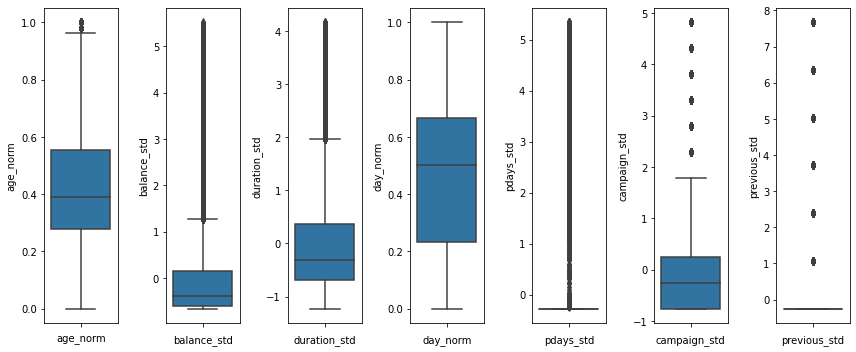

In [48]:
# kolom numerical dengan boxplot
nums_trans_check = ['age_norm',	'balance_std',	'duration_std','day_norm', 'pdays_std', 'campaign_std', 'previous_std']

features = nums_trans_check
plt.figure(figsize=(12,5))

for i in range(0, len(nums_trans_check)):
    plt.subplot(1,len(features) , i+1)
    sns.boxplot(y=df[features[i]], orient='v')
    plt.xlabel(features[i])
    plt.tight_layout()

In [49]:
df.describe()

,age_norm,balance_std,day_norm,duration_std,campaign_std,pdays_std,previous_std
count,36206.000000,3.620600e+04,36206.000000,3.620600e+04,3.620600e+04,3.620600e+04,3.620600e+04
mean,0.420347,1.256000e-17,0.494846,5.652000e-17,-1.884000e-17,-5.024000e-17,1.130400e-16
std,0.186597,1.000014e+00,0.278955,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,0.000000,-6.618028e-01,0.000000,-1.227115e+00,-7.579005e-01,-2.732673e-01,-2.502555e-01
25%,0.277778,-6.123866e-01,0.233333,-6.924067e-01,-7.579005e-01,-2.732673e-01,-2.502555e-01
50%,0.388889,-3.976614e-01,0.500000,-3.082474e-01,-2.511312e-01,-2.732673e-01,-2.502555e-01
75%,0.555556,1.406223e-01,0.666667,3.666271e-01,2.556381e-01,-2.732673e-01,-2.502555e-01
max,1.000000,5.515223e+00,1.000000,4.161498e+00,4.816562e+00,5.338817e+00,7.671135e+00


In [50]:
df['balance_std'].value_counts()

-0.661803    5167
-0.661214     172
-0.660626     131
-0.659450     119
-0.660038     109
             ... 
 0.406529       1
 3.675646       1
 2.334937       1
 3.849191       1
 5.050475       1
Name: balance_std, Length: 5500, dtype: int64

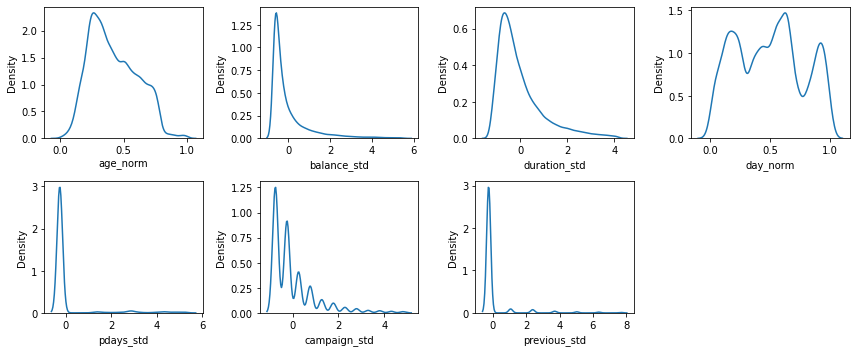

In [51]:
nums_trans_check = ['age_norm',	'balance_std',	'duration_std','day_norm', 'pdays_std', 'campaign_std', 'previous_std']

features = nums_trans_check
plt.figure(figsize=(12, 5))
for i in range(0, len(nums_trans_check)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=(df[features[i]]))
    plt.xlabel(features[i])
    plt.tight_layout()

### Hasil analisa:

1. Untuk kolom Day dan Age sementara dipilih menggunakan Normaliasasi, sedangkan lainnya menggunakan Standarisasi karena yang lain terlihat di boxplot banyak sekali terdapat outlier

2. Berdasarkan boxplot:
*   Kolom Age masih memiliki sedikit outlier
*   Kolom Day Tidak memiliki outlier (sejak awal) ->karena nilai maksimalnya sudah pasti 
*   Kolom Balance, Duration, Pdays, Campaign dan Previous memiliki banyak outlier (pdays & previous = extreme)

3. Berdasarkan histogram:
* Kebanyakan grafik masih bersifat skewed kecuali kolom Day dan age yang mendekati normal
<br></br>

** Untuk tahapan transformasi ini sebenarnya bisa menyesuaikan dengan model Machine Learning yang akan dipilih nanti, tidak semua harus ditransformasi/harus menggunakan teknik tertentu (pemilihan teknik dapat bervariasi menyesuaikan syarat model) . Nantinya mungkin tahap ini akan diterka lagi.

#Feature Encoding

In [52]:
df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,36206,36206,36206,36206,36206,36206,36206,36206,36206,36206
unique,11,3,3,2,2,2,2,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,8196,21749,20284,35470,20092,29968,34121,11139,33299,32961


## Label Encoding

In [53]:
mapping_default = {
    'no' : 0,
    'yes' : 1
}

mapping_housing = {
    'no' : 0,
    'yes' : 1,
}

mapping_loan = {
    'no' : 0,
    'yes' : 1
}

mapping_y = {
    'no' : 0,
    'yes' : 1
}

df['default'] = df['default'].map(mapping_default)
df['housing'] = df['housing'].map(mapping_housing)
df['loan'] = df['loan'].map(mapping_loan)
df['y'] = df['y'].map(mapping_y)

## One Hot Encoding

In [54]:
for cat in ['job', 'marital','education','contact','month','poutcome']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [55]:
df = df.drop(columns=['job', 'marital','education','contact','month','poutcome'])

In [56]:
df.head()

,default,housing,loan,y,age_norm,balance_std,day_norm,duration_std,campaign_std,pdays_std,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,0,0.740741,0.598899,0.133333,0.127825,-0.7579,-0.273267,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,0.481481,-0.644742,0.133333,-0.443222,-0.7579,-0.273267,...,0,0,1,0,0,0,0,0,0,1
2,0,1,1,0,0.277778,-0.660626,0.133333,-0.832573,-0.7579,-0.273267,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0.537037,0.224159,0.133333,-0.749511,-0.7579,-0.273267,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0.277778,-0.661214,0.133333,-0.199229,-0.7579,-0.273267,...,0,0,1,0,0,0,0,0,0,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36206 entries, 0 to 45209
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   default              36206 non-null  int64  
 1   housing              36206 non-null  int64  
 2   loan                 36206 non-null  int64  
 3   y                    36206 non-null  int64  
 4   age_norm             36206 non-null  float64
 5   balance_std          36206 non-null  float64
 6   day_norm             36206 non-null  float64
 7   duration_std         36206 non-null  float64
 8   campaign_std         36206 non-null  float64
 9   pdays_std            36206 non-null  float64
 10  previous_std         36206 non-null  float64
 11  job_admin.           36206 non-null  uint8  
 12  job_blue-collar      36206 non-null  uint8  
 13  job_entrepreneur     36206 non-null  uint8  
 14  job_housemaid        36206 non-null  uint8  
 15  job_management       36206 non-null 

# Imbalance Dataset

In [58]:
df['y'].value_counts()

0    32961
1     3245
Name: y, dtype: int64

In [59]:
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['y']]]
y = df['y'].values
print(X.shape)
print(y.shape)

(36206, 45)
(36206,)


In [60]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(sampling_strategy=0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(sampling_strategy=0.5, random_state=1).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(X, y)

In [61]:
print('Original')
print(pd.Series(y).value_counts())
print('Undersampling')
print(pd.Series(y_under).value_counts())
print('Oversampling')
print(pd.Series(y_over).value_counts())
print('oversampling Smote')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    32961
1     3245
dtype: int64
Undersampling
0    6490
1    3245
dtype: int64
Oversampling
0    32961
1    16480
dtype: int64
oversampling Smote
0    32961
1    16480
dtype: int64


# Feature Engineering

In [62]:
nums = ['age','balance','day','duration','campaign','pdays','previous', 'converted']
cats = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

dfs= pd.read_csv('https://raw.githubusercontent.com/angkasatech/ds/37146328bc5814f4e7a0adb739e6574def32b6dc/banking_train.csv', delimiter=';')

dfs['defaults'] = dfs['default'].apply(lambda x: 1 if 'yes' in x else 0)
dfs['loans'] = dfs['loan'].apply(lambda x: 1 if 'yes' in x else 0)
dfs['converted'] = dfs['y'].apply(lambda x: 1 if 'yes' in x else 0)

dfs.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,defaults,loans,converted
23933,39,technician,divorced,secondary,no,8,no,no,cellular,29,aug,1028,2,-1,0,unknown,no,0,0,0
13025,42,management,married,secondary,no,4314,no,no,cellular,7,jul,214,1,-1,0,unknown,no,0,0,0
12429,34,blue-collar,married,secondary,no,0,yes,no,unknown,30,jun,780,3,-1,0,unknown,no,0,0,0
12927,58,technician,divorced,secondary,no,-354,yes,yes,cellular,7,jul,98,1,-1,0,unknown,no,0,1,0
2088,55,services,single,secondary,no,-40,yes,no,unknown,12,may,178,2,-1,0,unknown,no,0,0,0


<AxesSubplot:>

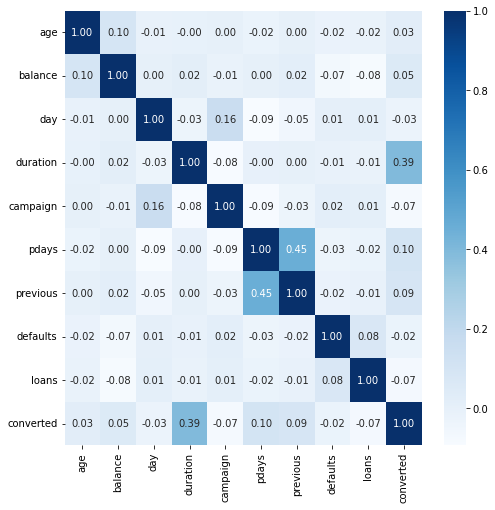

In [63]:
plt.figure(figsize=(8, 8))
sns.heatmap(dfs.corr(), cmap='Blues', annot=True, fmt='.2f')

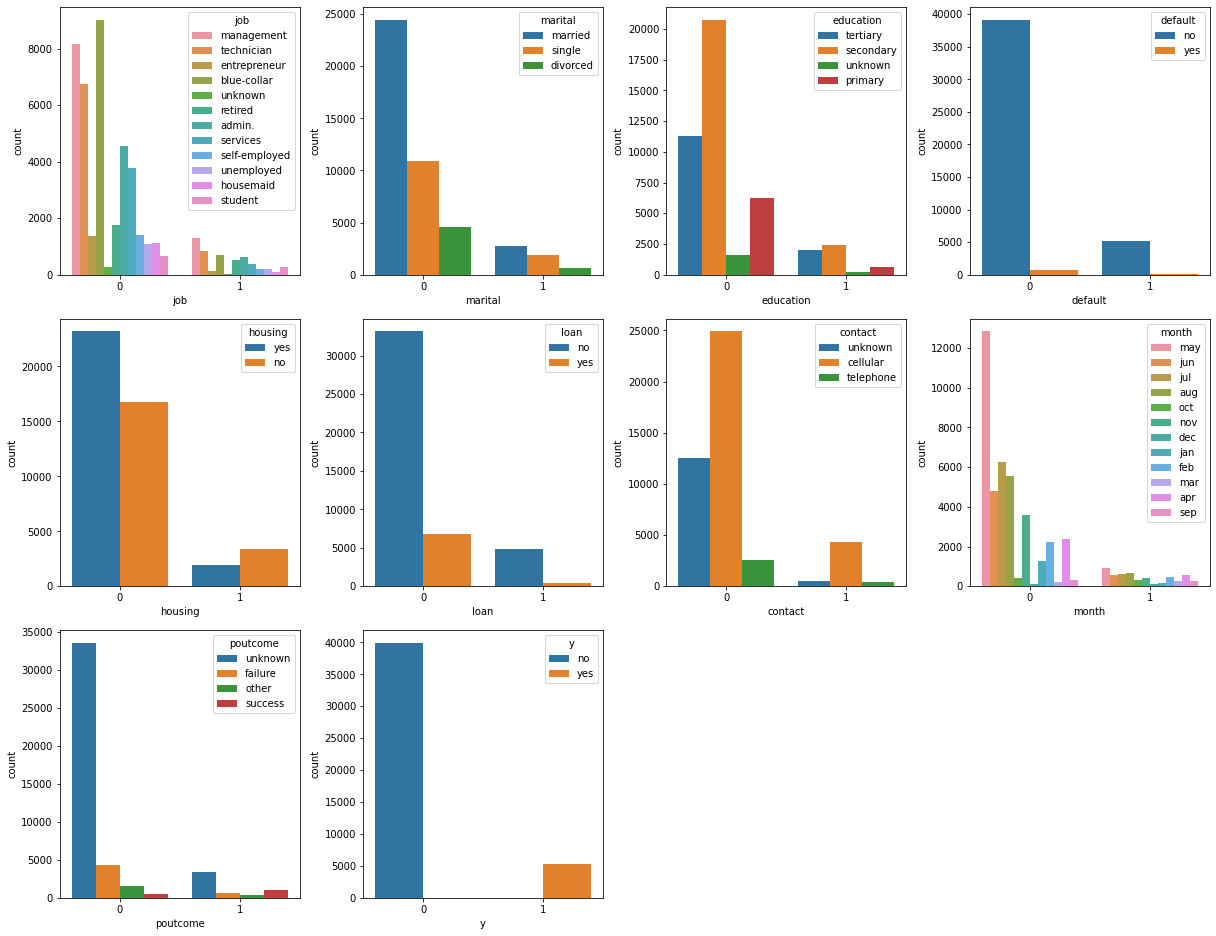

In [64]:
features = cats
plt.figure(figsize=(17, 17))
for i in range(0, len(features)):
    plt.subplot(4, 4, i+1) 
    sns.countplot(data=dfs, x='converted', hue=features[i])
    plt.xlabel(features[i])
    plt.tight_layout()

In [65]:
dfs['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

## A. Feature selection


A. selection: 
*Hasil dari analisa diatas dipilih beberapa feature yang kemungkinan paling berpengaruh:

Feature reduction: 
categorical: job, marital, education (kurang ada relasi dengan target), default (mirip dengan loan), month, poutcome
numerical: nums = pdays (ada nilai -1).

Jadi fitur yang akan dicoba adalah:
Optional feature 1: housing, loan, contact, y , age, balance, duration, campaign, previous, day.

Optional feature 2: housing, loan, contact, y , age, duration, campaign

Optional feature 3: *kemungkinan akan ada perubahan fitur yg dipilih/diuji lagi di next stage.

## B. Feature extraction

Tidak ada fitur yang perlu diekstrak, karena setiap fitur sudah cukup fungsional dengan data aslinya, mungkin beberapa perlu di encoding.

## C. New Feature Idea


Ide fitur tambahan: mempunyai anak/tanggungan berapa, gaji, gagal bayar, status pegawai tetap, saran terhadap fitur 'job' untuk diisi dengan : PNS/Pengusaha/Karyawan/Frelencer (agar segmentasinya agar tidak terlalu lebih banyak).